## Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.
## Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?usp=share_link

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\tanji\Desktop\myPW\assignments\datasets\heart disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no null values

## Q2. Split the dataset into a training set (70%) and a test set (30%).

In [6]:
from sklearn.model_selection import train_test_split

x=df.drop('target',axis=1)
y=df['target']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3, random_state=42)
xtrain.shape,xtest.shape

((212, 13), (91, 13))

In [7]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

## Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

In [8]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=100, max_depth=10)

rfc.fit(xtrain,ytrain)

ypred=rfc.predict(xtest)

## Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("accuracy score: ",accuracy_score(ytest,ypred))
print("precision score: ",precision_score(ytest,ypred))
print("recall score: ",recall_score(ytest,ypred))
print("f1_score: ",f1_score(ytest,ypred))

accuracy score:  0.8131868131868132
precision score:  0.8235294117647058
recall score:  0.84
f1_score:  0.8316831683168315


## Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

In [10]:
feature_importances=rfc.feature_importances_
feature_importances

array([0.08646942, 0.03111584, 0.12995863, 0.06891185, 0.07475316,
       0.00951155, 0.01636275, 0.10434548, 0.06832464, 0.1114381 ,
       0.0480837 , 0.14608861, 0.10463626])

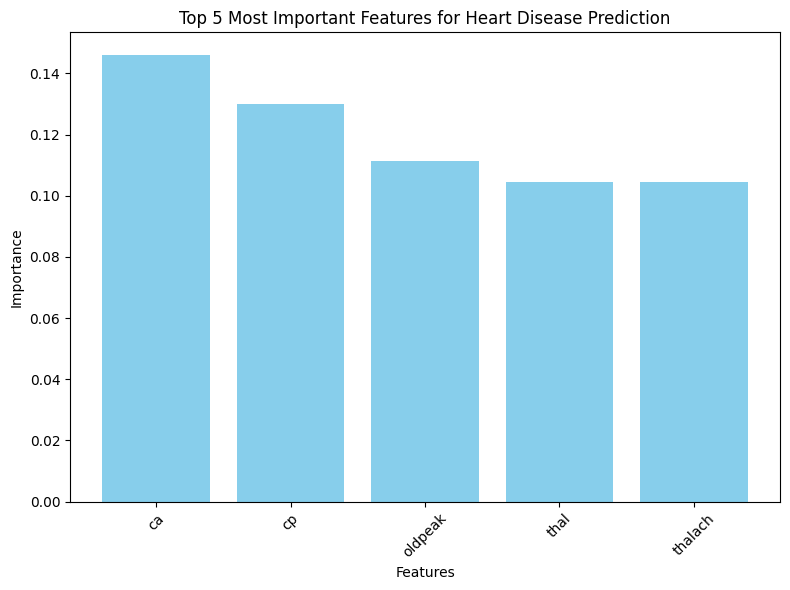

In [11]:
import matplotlib.pyplot as plt

feature_importances = rfc.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_5_features = feature_importance_df.head(5)

plt.figure(figsize=(8, 6))
plt.bar(top_5_features['Feature'], top_5_features['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 5 Most Important Features for Heart Disease Prediction')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 5 important features are
- ca
- thal
- cp
- thalach
- oldpeak

## Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [15]:
from sklearn.model_selection import GridSearchCV


parameter={
    'n_estimators':[50,100,150,200],
    'max_depth':[5,6],
    'min_samples_split':list(range(7,10)) ,
    'min_samples_leaf': list(range(7,10))
}

clf=GridSearchCV(RandomForestClassifier(), param_grid=parameter, cv=5,verbose=3, scoring='accuracy')
clf.fit(xtrain,ytrain)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END max_depth=5, min_samples_leaf=7, min_samples_split=7, n_estimators=50;, score=0.884 total time=   0.1s
[CV 2/5] END max_depth=5, min_samples_leaf=7, min_samples_split=7, n_estimators=50;, score=0.791 total time=   0.1s
[CV 3/5] END max_depth=5, min_samples_leaf=7, min_samples_split=7, n_estimators=50;, score=0.810 total time=   0.1s
[CV 4/5] END max_depth=5, min_samples_leaf=7, min_samples_split=7, n_estimators=50;, score=0.929 total time=   0.1s
[CV 5/5] END max_depth=5, min_samples_leaf=7, min_samples_split=7, n_estimators=50;, score=0.762 total time=   0.1s
[CV 1/5] END max_depth=5, min_samples_leaf=7, min_samples_split=7, n_estimators=100;, score=0.884 total time=   0.2s
[CV 2/5] END max_depth=5, min_samples_leaf=7, min_samples_split=7, n_estimators=100;, score=0.860 total time=   0.2s
[CV 3/5] END max_depth=5, min_samples_leaf=7, min_samples_split=7, n_estimators=100;, score=0.762 total time=   0.2s
[CV 4/5

[CV 1/5] END max_depth=5, min_samples_leaf=8, min_samples_split=7, n_estimators=150;, score=0.884 total time=   0.4s
[CV 2/5] END max_depth=5, min_samples_leaf=8, min_samples_split=7, n_estimators=150;, score=0.860 total time=   0.4s
[CV 3/5] END max_depth=5, min_samples_leaf=8, min_samples_split=7, n_estimators=150;, score=0.786 total time=   0.7s
[CV 4/5] END max_depth=5, min_samples_leaf=8, min_samples_split=7, n_estimators=150;, score=0.905 total time=   0.4s
[CV 5/5] END max_depth=5, min_samples_leaf=8, min_samples_split=7, n_estimators=150;, score=0.738 total time=   0.4s
[CV 1/5] END max_depth=5, min_samples_leaf=8, min_samples_split=7, n_estimators=200;, score=0.884 total time=   0.6s
[CV 2/5] END max_depth=5, min_samples_leaf=8, min_samples_split=7, n_estimators=200;, score=0.860 total time=   0.6s
[CV 3/5] END max_depth=5, min_samples_leaf=8, min_samples_split=7, n_estimators=200;, score=0.762 total time=   0.6s
[CV 4/5] END max_depth=5, min_samples_leaf=8, min_samples_split=

[CV 2/5] END max_depth=5, min_samples_leaf=9, min_samples_split=8, n_estimators=50;, score=0.837 total time=   0.1s
[CV 3/5] END max_depth=5, min_samples_leaf=9, min_samples_split=8, n_estimators=50;, score=0.762 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=9, min_samples_split=8, n_estimators=50;, score=0.881 total time=   0.1s
[CV 5/5] END max_depth=5, min_samples_leaf=9, min_samples_split=8, n_estimators=50;, score=0.762 total time=   0.1s
[CV 1/5] END max_depth=5, min_samples_leaf=9, min_samples_split=8, n_estimators=100;, score=0.860 total time=   0.3s
[CV 2/5] END max_depth=5, min_samples_leaf=9, min_samples_split=8, n_estimators=100;, score=0.860 total time=   0.2s
[CV 3/5] END max_depth=5, min_samples_leaf=9, min_samples_split=8, n_estimators=100;, score=0.762 total time=   0.3s
[CV 4/5] END max_depth=5, min_samples_leaf=9, min_samples_split=8, n_estimators=100;, score=0.905 total time=   0.2s
[CV 5/5] END max_depth=5, min_samples_leaf=9, min_samples_split=8, n

[CV 3/5] END max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=150;, score=0.714 total time=   0.5s
[CV 4/5] END max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=150;, score=0.905 total time=   0.4s
[CV 5/5] END max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=150;, score=0.762 total time=   0.4s
[CV 1/5] END max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=200;, score=0.884 total time=   0.5s
[CV 2/5] END max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=200;, score=0.837 total time=   0.6s
[CV 3/5] END max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=200;, score=0.762 total time=   0.5s
[CV 4/5] END max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=200;, score=0.905 total time=   0.5s
[CV 5/5] END max_depth=6, min_samples_leaf=7, min_samples_split=8, n_estimators=200;, score=0.738 total time=   0.5s
[CV 1/5] END max_depth=6, min_samples_leaf=7, min_samples_split=

[CV 5/5] END max_depth=6, min_samples_leaf=8, min_samples_split=9, n_estimators=50;, score=0.762 total time=   0.1s
[CV 1/5] END max_depth=6, min_samples_leaf=8, min_samples_split=9, n_estimators=100;, score=0.884 total time=   0.2s
[CV 2/5] END max_depth=6, min_samples_leaf=8, min_samples_split=9, n_estimators=100;, score=0.837 total time=   0.3s
[CV 3/5] END max_depth=6, min_samples_leaf=8, min_samples_split=9, n_estimators=100;, score=0.738 total time=   0.2s
[CV 4/5] END max_depth=6, min_samples_leaf=8, min_samples_split=9, n_estimators=100;, score=0.905 total time=   0.2s
[CV 5/5] END max_depth=6, min_samples_leaf=8, min_samples_split=9, n_estimators=100;, score=0.786 total time=   0.3s
[CV 1/5] END max_depth=6, min_samples_leaf=8, min_samples_split=9, n_estimators=150;, score=0.884 total time=   0.4s
[CV 2/5] END max_depth=6, min_samples_leaf=8, min_samples_split=9, n_estimators=150;, score=0.837 total time=   0.4s
[CV 3/5] END max_depth=6, min_samples_leaf=8, min_samples_split=9

[CV 1/5] END max_depth=6, min_samples_leaf=9, min_samples_split=9, n_estimators=200;, score=0.884 total time=   0.6s
[CV 2/5] END max_depth=6, min_samples_leaf=9, min_samples_split=9, n_estimators=200;, score=0.860 total time=   0.6s
[CV 3/5] END max_depth=6, min_samples_leaf=9, min_samples_split=9, n_estimators=200;, score=0.762 total time=   0.5s
[CV 4/5] END max_depth=6, min_samples_leaf=9, min_samples_split=9, n_estimators=200;, score=0.905 total time=   0.6s
[CV 5/5] END max_depth=6, min_samples_leaf=9, min_samples_split=9, n_estimators=200;, score=0.786 total time=   0.6s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 6], 'min_samples_leaf': [7, 8, 9],
                         'min_samples_split': [7, 8, 9],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=3)

## Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

In [17]:
clf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 50}

In [18]:
clf.best_score_

0.8535991140642303

In [29]:
model=RandomForestClassifier(max_depth=6,n_estimators=8,min_samples_split=8,min_samples_leaf=50, )

model.fit(xtrain,ytrain)

ypred=clf.predict(xtest)

In [30]:
print("accuracy score: ",accuracy_score(ytest,ypred))
print("precision score: ",precision_score(ytest,ypred))
print("recall score: ",recall_score(ytest,ypred))
print("f1_score: ",f1_score(ytest,ypred))

accuracy score:  0.8461538461538461
precision score:  0.8333333333333334
recall score:  0.9
f1_score:  0.8653846153846153


## Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [37]:
model=RandomForestClassifier(max_depth=6,n_estimators=8,min_samples_split=8,min_samples_leaf=50, )

model.fit(xtrain,ytrain)

ypred=model.predict(xtest)

feature_importances=model.feature_importances_


feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_5_features = feature_importance_df.head(5)
top_5_features

,Feature,Importance
2,cp,0.250
11,ca,0.250
12,thal,0.250
9,oldpeak,0.125
10,slope,0.125
